In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [151]:
df=pd.read_csv('Documents/BRCA.csv')

In [152]:
print(df.head())

     Patient_ID   Age  Gender  Protein1  Protein2  Protein3  Protein4  \
0  TCGA-D8-A1XD  36.0  FEMALE  0.080353   0.42638   0.54715  0.273680   
1  TCGA-EW-A1OX  43.0  FEMALE -0.420320   0.57807   0.61447 -0.031505   
2  TCGA-A8-A079  69.0  FEMALE  0.213980   1.31140  -0.32747 -0.234260   
3  TCGA-D8-A1XR  56.0  FEMALE  0.345090  -0.21147  -0.19304  0.124270   
4  TCGA-BH-A0BF  56.0  FEMALE  0.221550   1.90680   0.52045 -0.311990   

  Tumour_Stage                      Histology ER status PR status HER2 status  \
0          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
1           II             Mucinous Carcinoma  Positive  Positive    Negative   
2          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
3           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
4           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   

                  Surgery_type Date_of_Surgery Date_of_Last_Visit  \
0  Mo

In [153]:
# Check for missing values
print("Missing values before dropna:")
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)


Missing values before dropna:
Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64


In [154]:
def check_df(dataframe):
    print(" SHAPE ".center(70,'~'))
    print(dataframe.shape)
    print(" TYPES ".center(70,'~'))
    print(dataframe.dtypes)
    print(" HEAD ".center(70,'~'))
    print(dataframe.head())
    print(" DESCRIBE ".center(70,'~'))
    print(dataframe.describe().T)
check_df(df)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ SHAPE ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
(317, 16)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ TYPES ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Patient_ID             object
Age                   float64
Gender                 object
Protein1              float64
Protein2              float64
Protein3              float64
Protein4              float64
Tumour_Stage           object
Histology              object
ER status              object
PR status              object
HER2 status            object
Surgery_type           object
Date_of_Surgery        object
Date_of_Last_Visit     object
Patient_Status         object
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ HEAD ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
     Patient_ID   Age  Gender  Protein1  Protein2  Protein3  Protein4  \
0  TCGA-D8-A1XD  36.0  FEMALE  0.080353   0.42638   0.54715  0.273680   
1  TCGA-EW-A1OX  43.0  FEMALE -0.420320   0.57807   0.61447 -0.031505   
2  TCGA-A8-A079  69.0  FEMALE  0.213980   1.31140  -0.32747 -0.2

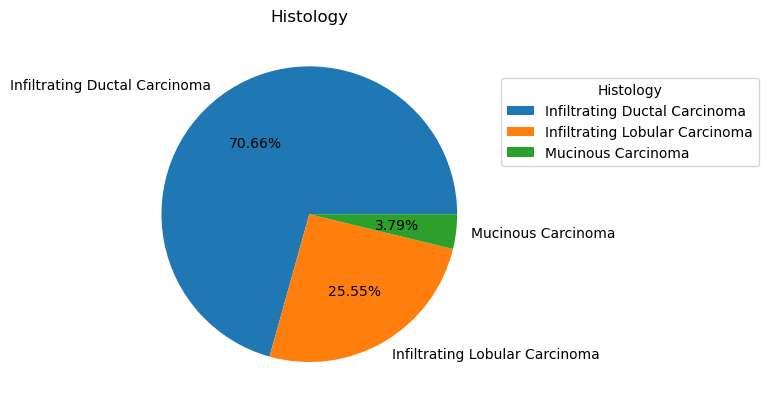

In [155]:
#histology pie chart
df['Histology'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title('Histology')
plt.ylabel('') #remove y label
plt.legend(title="Histology", loc="center left", bbox_to_anchor=(1,0.75))
plt.show()

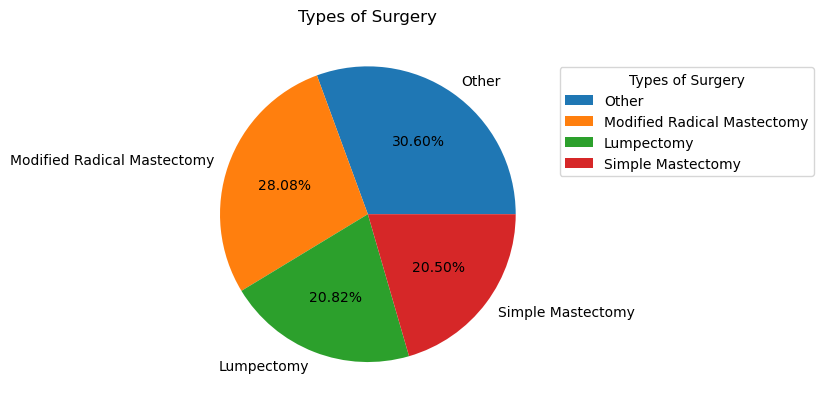

In [156]:
#Type of surgery pie chart
surgery= df['Surgery_type'].value_counts()
transactions= surgery.index
quantity= surgery.values
surgery.plot(kind='pie', autopct='%1.2f%%', title= "Types of Surgery")
plt.ylabel('')
plt.legend(title="Types of Surgery", loc="center left", bbox_to_anchor=(1,0.75))
plt.show()

Analysis of categorical variables


In [157]:
#create target variable= alive vs dead status
target= df['Patient_Status']

#create feature variable, drop features that dont help to predict alive vs dead and drop target
features= df[['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 
                   'Tumour_Stage', 'Histology', 'ER status', 'PR status', 
                   'HER2 status', 'Surgery_type']]

# Verify that features and target variable have been set correctly
print("Features:", features.columns)
print("Target variable:", target.name)

Features: Index(['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
       'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status',
       'Surgery_type'],
      dtype='object')
Target variable: Patient_Status


In [158]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Verify the shape of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (253, 12)
X_test shape: (64, 12)
y_train shape: (253,)
y_test shape: (64,)


In [159]:
# Define categorical and continuous columns
categorical = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
continuous = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print('categorical', categorical, 'continuous', continuous)

categorical ['Patient_ID', 'Gender', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit', 'Patient_Status'] continuous ['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4']


In [160]:
#create processing pipeline for features, transform categorical to continuous
numerical_transformer= StandardScaler()
categorical_transformer= OneHotEncoder(handle_unknown='ignore')

column_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous),
        ('cat', OneHotEncoder(), categorical)])


pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('classifier', RandomForestClassifier(random_state=42))
])

Model Training and Evaluation

In [161]:
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Model Accuracy:', accuracy)


ValueError: A given column is not a column of the dataframe